<a href="https://colab.research.google.com/github/NiloufarYousefi/-Final-project/blob/main/models_algorithms_to_analyze_the_data_train_csv_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Head of the dataset:
   x_1  x_2       x_3       x_4   y
0    1    0  2.976142  0.651482  10
1    0    1  1.411390  0.743732  12
2    0    1  1.039892  1.290588   7
3    1    0  2.338679  0.973942  15
4    0    1  2.385257  0.297921   9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     2400 non-null   int64  
 1   x_2     2400 non-null   int64  
 2   x_3     2400 non-null   float64
 3   x_4     2400 non-null   float64
 4   y       2400 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 93.9 KB
None

Missing values per column:
x_1    0
x_2    0
x_3    0
x_4    0
y      0
dtype: int64

Dataset after filling missing values:
   x_1  x_2       x_3       x_4   y
0    1    0  2.976142  0.651482  10
1

<ipython-input-12-55bd34844dd7>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies, palette='viridis')


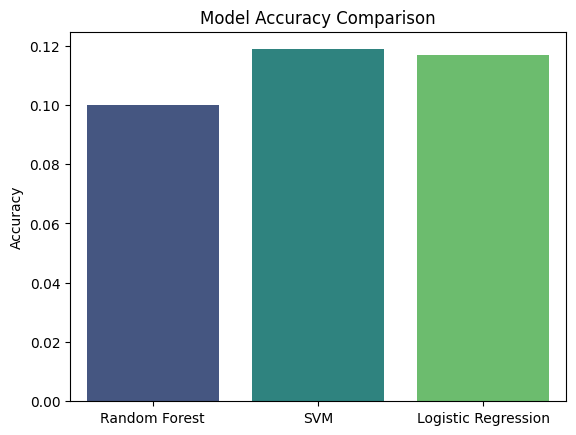


Best Model: SVM with Accuracy: 0.12


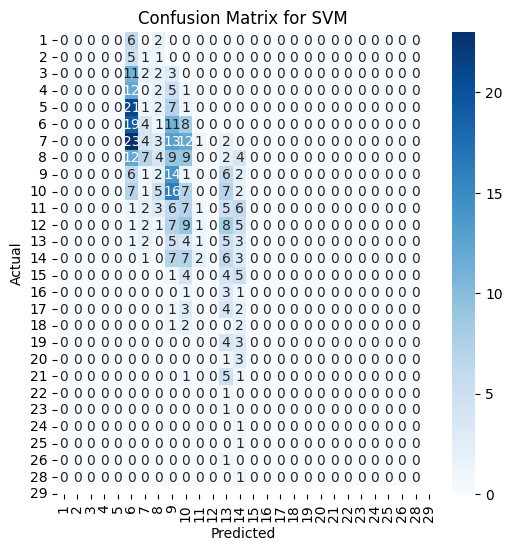

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset from Google Drive, treating "########" as missing values
train_data = pd.read_csv('/content/drive/My Drive/train.csv', na_values='########')

# Display basic info and missing value counts
print("Head of the dataset:")
print(train_data.head())
print("\nDataset Info:")
print(train_data.info())
print("\nMissing values per column:")
print(train_data.isnull().sum())

# Fill missing values with the mean for each column
train_data.fillna(train_data.mean(), inplace=True)

# Confirm missing values are handled
print("\nDataset after filling missing values:")
print(train_data.head())
print("\nMissing values per column (after filling):")
print(train_data.isnull().sum())

# Split the dataset into features and target
X = train_data[['x_1', 'x_2', 'x_3', 'x_4']]
y = train_data['y']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter to ensure convergence

# Train the models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

print("\nModel Accuracies:")
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)

# Visualize the accuracies using a barplot
models = ['Random Forest', 'SVM', 'Logistic Regression']
accuracies = [rf_accuracy, svm_accuracy, lr_accuracy]

ax = sns.barplot(x=models, y=accuracies, palette='viridis')
# Remove the legend if it exists (to avoid the FutureWarning about palette without hue)
if ax.get_legend() is not None:
    ax.legend_.remove()
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Select the best model based on accuracy
if rf_accuracy >= svm_accuracy and rf_accuracy >= lr_accuracy:
    best_model_name = 'Random Forest'
    best_model_instance = rf_model
    best_accuracy = rf_accuracy
elif svm_accuracy >= lr_accuracy:
    best_model_name = 'SVM'
    best_model_instance = svm_model
    best_accuracy = svm_accuracy
else:
    best_model_name = 'Logistic Regression'
    best_model_instance = lr_model
    best_accuracy = lr_accuracy

print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.2f}")

# Plot the confusion matrix for the best model
cm = confusion_matrix(y_test, best_model_instance.predict(X_test))
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
